# Supervised Logistic Regression for Classification
<hr>

## 0. Import library

In [229]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>

The data features $x_i=(x_{i(1)},x_{i(2)})$ represent 2 exam grades $x_{i(1)}$ and $x_{i(2)}$ for each student $i$.

The data label $y_i$ indicates if the student $i$ was admitted (value is 1) or rejected (value is 0).

In [230]:
# import data with numpy
data = np.loadtxt('dataset.txt', delimiter=',')

# number of training data
n = data.shape[0]
print('Number of training data=',n)

Number of training data= 100


## 2. Explore the dataset distribution
<hr>

Plot the training data points.<br>

You may use matplotlib function `scatter(x,y)`.

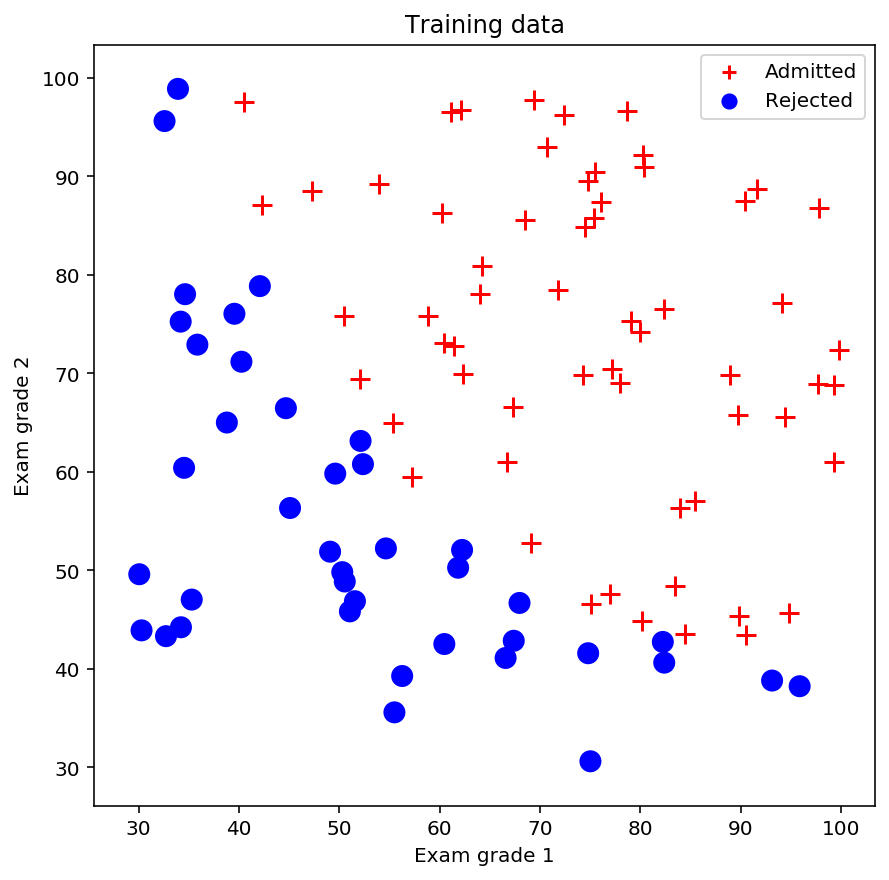

In [232]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

plt.figure(num=1, figsize=(7, 7))
plt.scatter(x1, x2, idx_admit*100, marker='+', color='r', label='Admitted') 
plt.scatter(x1, x2, idx_rejec*100, color='b', label='Rejected') 
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.show()

## 3. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

Define and plot the sigmoid function for values in [-10,10]:

You may use functions `np.exp`, `np.linspace`.

(50,)
(50,)


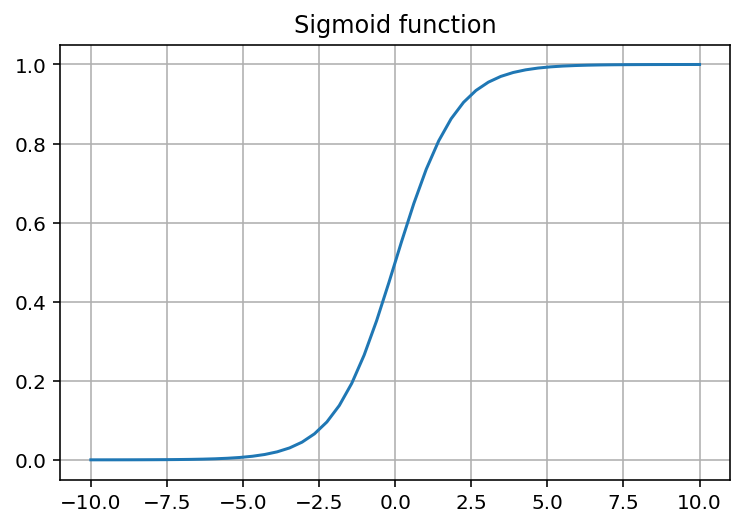

In [244]:
def sigmoid(z):
    
    sigmoid_f = 1 / (1 + np.exp(-z))
    
    return sigmoid_f 


# plot
x_values = np.linspace(-10,10)
print(x_values.shape)
print(sigmoid(x_values).shape)

plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 4. Define the prediction function for the classification
<hr>

#### The prediction function is defined by:

$$
\begin{aligned}
p_w(x) = \sigma(w_0 + w_1 x_{(1)} + w_2 x_{(2)}) = \sigma(w^T x)
\end{aligned}
$$

#### Implement the prediction function in a vectorised way as follows:

$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Use the new function `sigmoid`.

In [234]:
# construct the data matrix X
n = data.shape[0]
X = np.ones([n,3])

X[:,1] = x1
X[:,2] = x2

# parameters vector
w = np.array([-10,0.1,-0.2])[:,None]

# predictive function definition
def f_pred(X,w): 
    
    p = sigmoid(X@w)
    
    return p

y_pred = f_pred(X,w)
print(y_pred.shape)

(100, 1)


## 5. Define the classification loss function 
<hr>

#### Mean Square Error

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( \sigma( w^T x_i ) - y_i \right)^2
$$

#### Cross-Entropy

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( - y_i \log( \sigma( w^T x_i ) ) - (1 - y_i) \log( 1 - \sigma( w^T x_i ) ) \right)
$$

#### The vectorized representation is for the mean square error is as follows:

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

#### The vectorized representation is for the cross-entropy error is as follows:

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

where

$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

You may use numpy functions `.T` and `np.log`.

In [235]:
def mse_loss(pw_x, y):  # mean square error 
    
    loss = (pw_x - y).T @ (pw_x - y) / n
    
    return np.mean(loss)

def ce_loss(pw_x, y):  # cross-entropy error
    
    loss = (-y.T @ np.log(pw_x) - (1-y).T @ np.log(1-pw_x)) / n
    
    return np.mean(loss) 

## 6. Define the gradient of the classification loss function 
<hr>

#### Given the mean square loss

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Given the cross-entropy loss

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(p_w(x)-y)
$$

#### Implement the vectorized version of the gradient of the classification loss function

In [236]:
def mse_grad(pw_x,y,X):

    grad = X.T @ ((pw_x - y) @ (pw_x.T @ (1-pw_x))) * 2 / n
    
    return grad

def ce_grad(pw_x,y,X):

    grad = X.T @ (pw_x - y) * 2 / n
    
    return grad

# loss function definition
def loss_logreg(pw_x,y): 
    
    n = len(y)
    loss = (-y.T @ np.log(pw_x) - (1-y).T @ np.log(1-pw_x)) / n
    
    return loss


# Test loss function 
y = data[:,2][:,None] # label 
y_pred = f_pred(X,w) # prediction
print(y_pred.shape)
loss = loss_logreg(y_pred,y)
print(loss.shape, loss)
print((y_pred-y).shape)
print((1-y_pred).shape)
print(y_pred.shape)
print(X.shape)
grad_f = mse_grad(y_pred,y,X)
print(grad_f.shape)

(100, 1)
(1, 1) [[10.39164415]]
(100, 1)
(100, 1)
(100, 1)
(100, 3)
(3, 1)


## 7. Implement the gradient descent algorithm 
<hr>

#### Vectorized implementation for the mean square loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Vectorized implementation for the cross-entropy loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T(p_w(x)-y)
$$

#### Plot the loss values $L(w^k)$ w.r.t. iteration $k$ the number of iterations for the both loss functions.

0.2727819028109092
[-10.00398536   0.08549586   0.07924497]


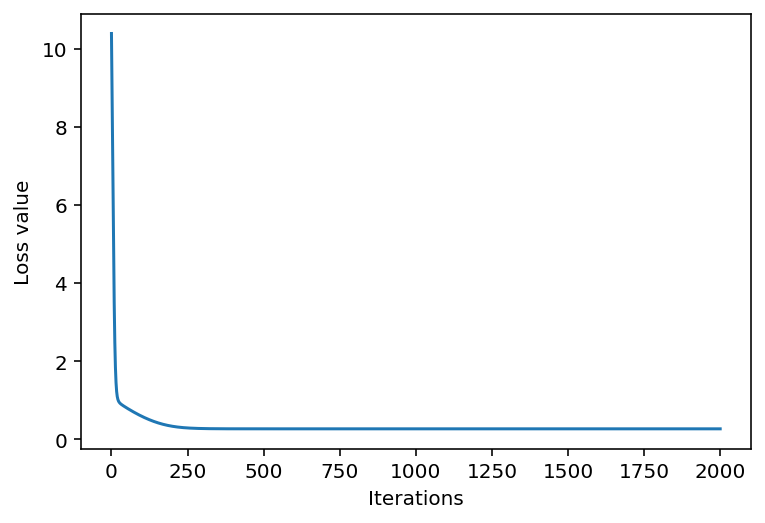

In [238]:
# gradient descent function definition
def mse_grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=2000):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,3]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X,w) # linear predicition function 
        grad_f = ce_grad(y_pred,y,X) # gradient of the loss 
        w = w - tau * grad_f # update rule of gradient descent 
        L_iters[i] = mse_loss(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0], w[1], w[2] # save the current w value 
        
    return w, L_iters, w_iters

def ce_grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=2000):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,3]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X,w) # linear predicition function 
        grad_f = ce_grad(y_pred,y,X) # gradient of the loss 
        w = w - tau * grad_f # update rule of gradient descent 
        L_iters[i] = ce_loss(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0], w[1], w[2] # save the current w value 
        
    return w, L_iters, w_iters

# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
tau = 1e-4; max_iter = 2000
w, L_iters, w_iters = ce_grad_desc(X,y,w_init,tau,max_iter)

print(L_iters[-1])
print(w_iters[-1])

# plot
plt.figure(3)
plt.plot(L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 8. Plot the decision boundary
<hr>

The decision boundary is defined by all points 

$$
x=(x_{(1)},x_{(2)}) \quad \textrm{ such that } \quad p_w(x) = 0.5
$$

You may use numpy and matplotlib functions `np.meshgrid`, `np.linspace`, `reshape`, `contour`.

(50, 50) (50, 50)


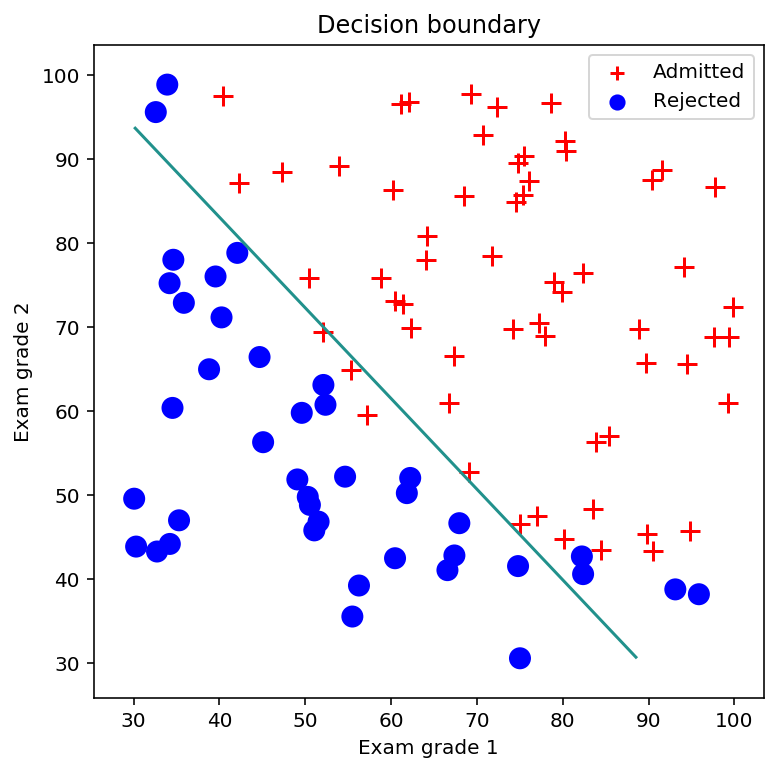

In [239]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape((len(xx1), len(xx2)))
print(xx1.shape, xx2.shape)

# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1, x2, idx_admit*100, marker='+', color='r', label='Admitted') 
plt.scatter(x1, x2, idx_rejec*100, color='b', label='Rejected') 
plt.contour(xx1, xx2, p, 1) 
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.title('Decision boundary')
plt.show()

## 9. Comparison with Scikit-learn logistic regression algorithm with the gradient descent with the cross-entropy loss
<hr>

You may use scikit-learn function `LogisticRegression(C=1e6)`.

(100, 2)
-24.955278335878877 [[0.20458394 0.19980387]] (1, 2) (2,)
[0.20350406]


C:\Users\KSY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


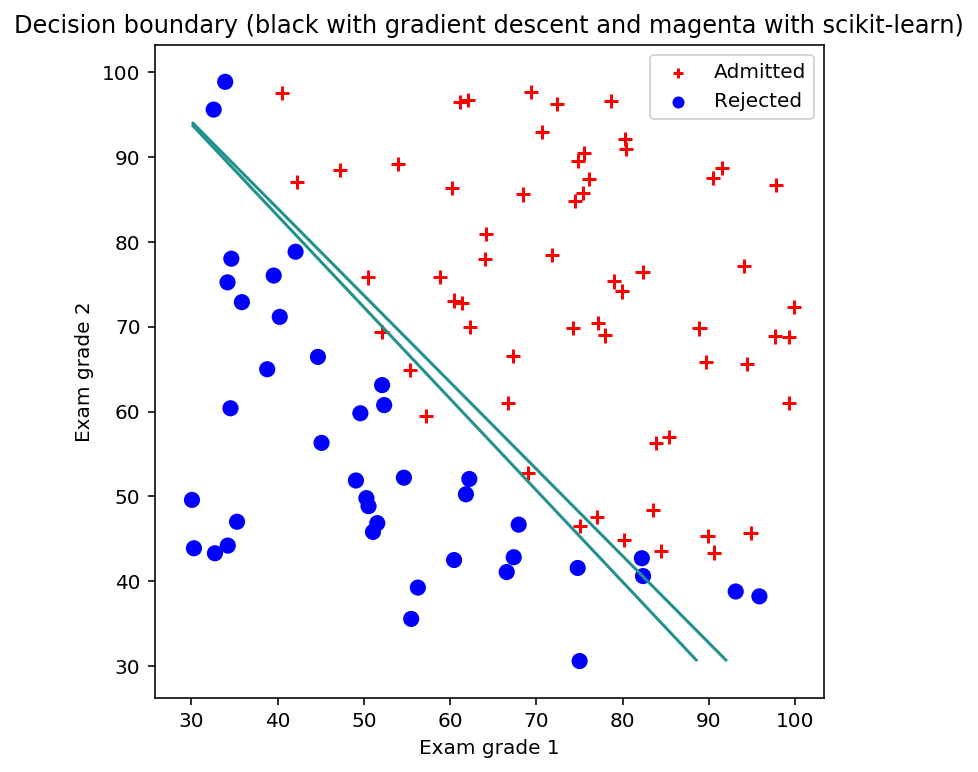

In [223]:
# run logistic regression with scikit-learn
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6)# scikit-learn logistic regression
print(np.array([x1, x2]).T.shape)

y = np.ravel(y)

logreg_sklearn.fit(np.array([x1, x2]).T, y) # learn the model parameters 

# compute loss value
w_sklearn = np.zeros([3,1])
w_sklearn[0,0] = logreg_sklearn.intercept_
print(w_sklearn[0,0], logreg_sklearn.coef_, logreg_sklearn.coef_.shape, w_sklearn[1:3,0].shape)
w_sklearn[1:3,0] = logreg_sklearn.coef_

y_pred = f_pred(X, w_sklearn)
loss_sklearn = loss_logreg(y_pred, y)

print(loss_sklearn)

# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1, x2, idx_admit*50, marker='+', color='r', label='Admitted') 
plt.scatter(x1, x2, idx_rejec*50, color='b', label='Rejected')  
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # grade 2

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)

p_skl = f_pred(X2,w_sklearn)
p_skl = p_skl.reshape((len(xx1), len(xx2)))
plt.contour(xx1, xx2, p, 1) 
plt.contour(xx1, xx2, p_skl, 1)

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.legend()
plt.show()


## 10. Plot the probability map
<hr>

20.825688073394495
(110, 3)
(1, 3)


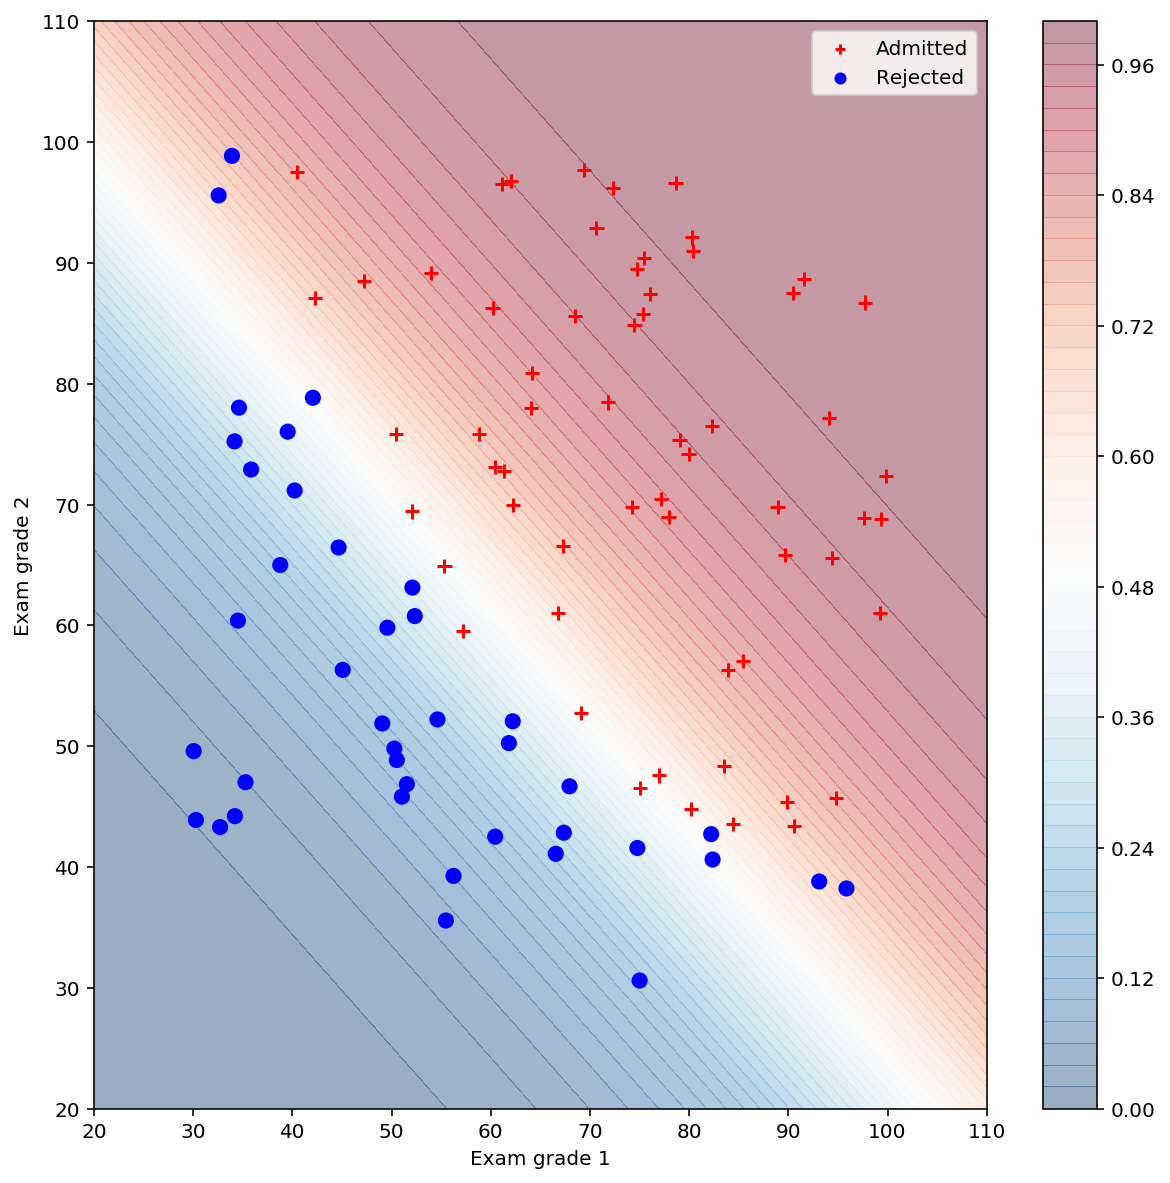

In [271]:
num_a = 110
grid_x1 = np.linspace(20,110,num_a)
grid_x2 = np.linspace(20,110,num_a)

score_x1, score_x2 = np.meshgrid(grid_x1, grid_x2)
print(grid_x1[1])

Z = np.zeros([len(score_x2), len(score_x1)])

X_pm = np.ones([num_a,3])

X_pm[:,1] = grid_x1
X_pm[:,2] = grid_x2
print(X_pm.shape)
print(np.array([[1, grid_x1[0], grid_x2[0]]]).shape)

for i in range(len(score_x2)): 
    for j in range(len(score_x1)):
        
            predict_prob = sigmoid(np.array([[1, grid_x1[j], grid_x2[i]]])@w)
            Z[j, i] = predict_prob
            
            # actual plotting example
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
#ax.tick_params()
ax.set_xlabel('Exam grade 1')
ax.set_ylabel('Exam grade 2')

ax.set_xlim(20, 110)
ax.set_ylim(20, 110)

cf = ax.contourf(score_x1, score_x2, Z, 50, cmap=plt.cm.RdBu_r, alpha=0.4)
ax.scatter(x1, x2, idx_admit*50, marker='+', color='r', label='Admitted') 
ax.scatter(x1, x2, idx_rejec*50, color='b', label='Rejected') 
cbar = fig.colorbar(cf)
cbar.update_ticks()

plt.legend()
plt.show()

# Output results

## 1. Plot the dataset in 2D cartesian coordinate system (1pt)

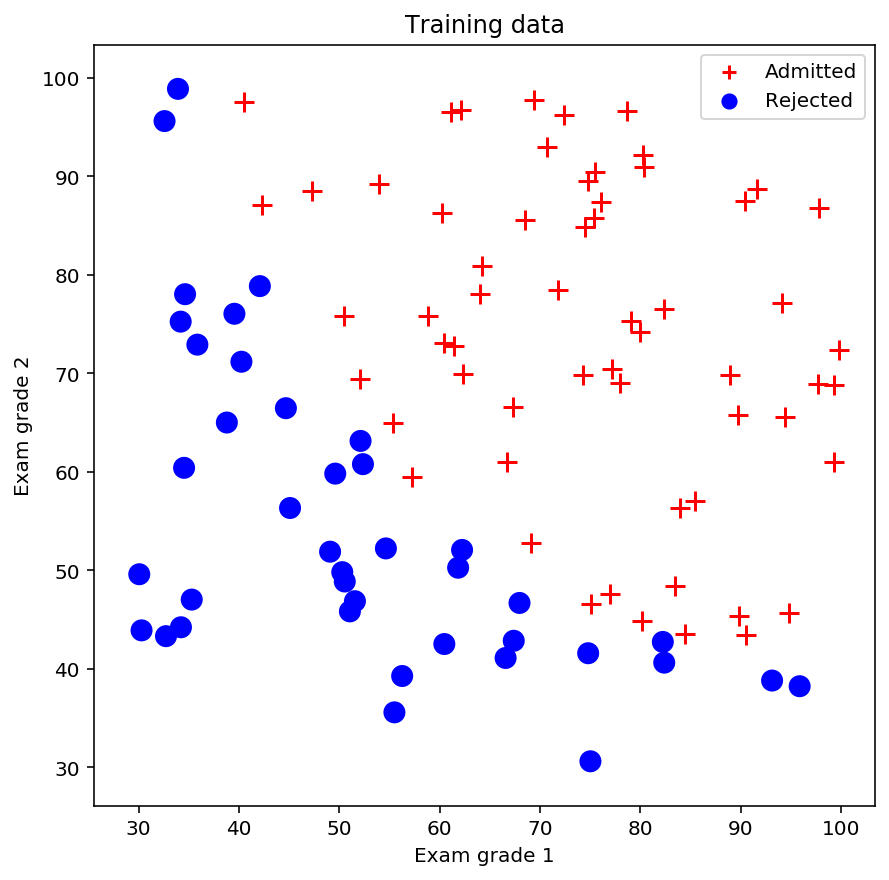

In [47]:
plt.figure(num=1, figsize=(7, 7))
plt.scatter(x1, x2, idx_admit*100, marker='+', color='r', label='Admitted') 
plt.scatter(x1, x2, idx_rejec*100, color='b', label='Rejected') 
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.show()

## 2. Plot the sigmoid function (1pt)

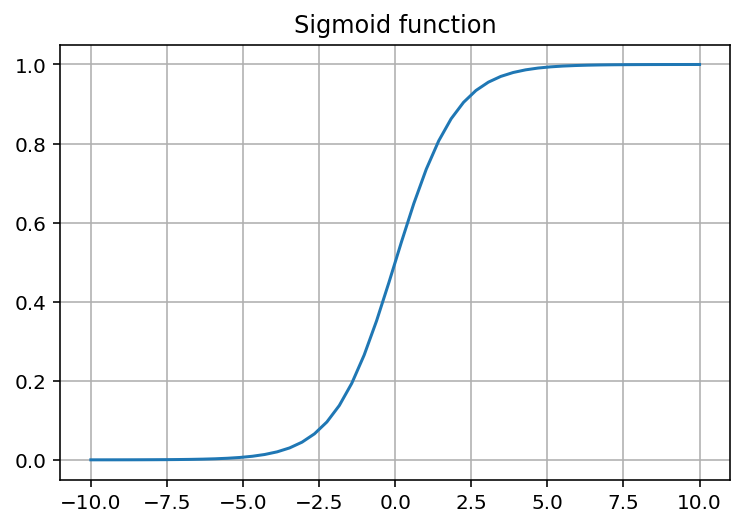

In [49]:
plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 3. Plot the loss curve in the course of gradient descent using the mean square error (2pt)

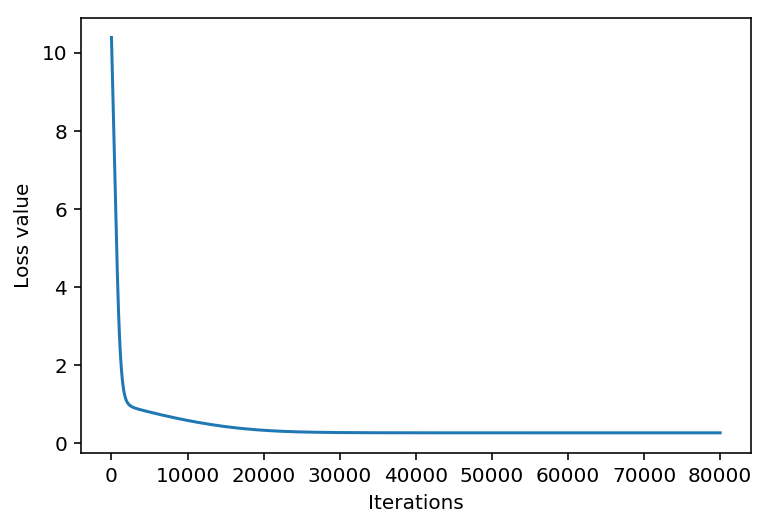

## 4. Plot the loss curve in the course of gradient descent using the cross-entropy error (2pt)

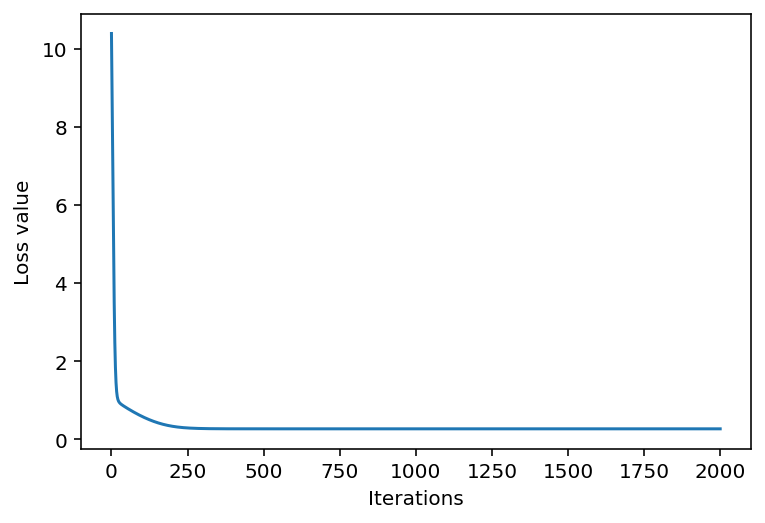

In [197]:
# plot
plt.figure(3)
plt.plot(L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 5. Plot the decision boundary using the mean square error (2pt)

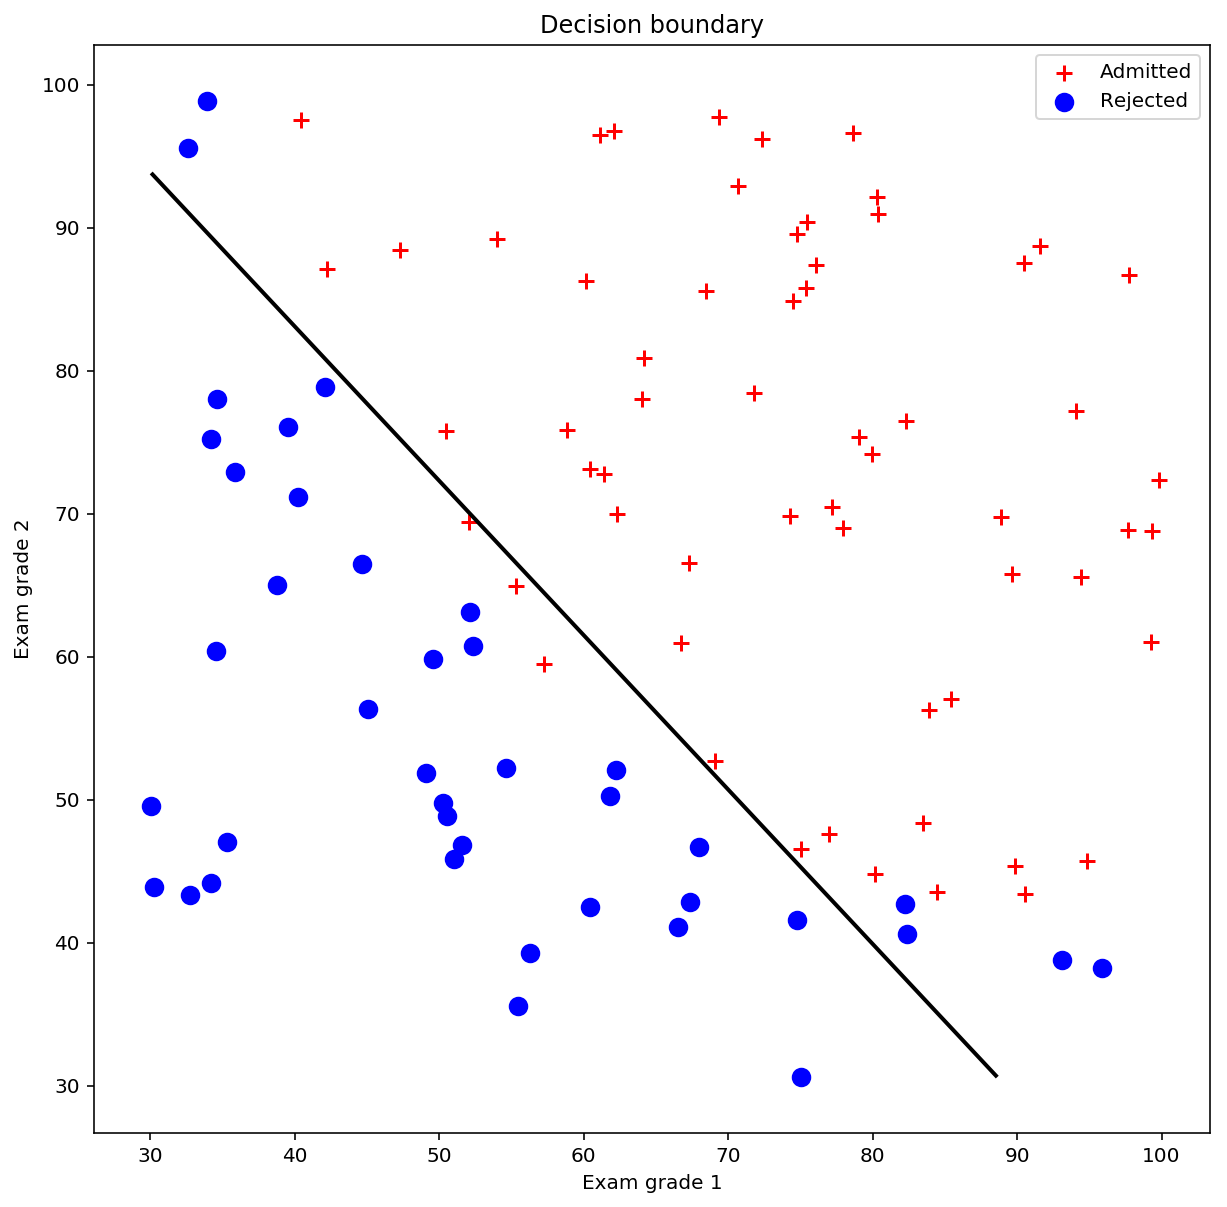

## 6. Plot the decision boundary using the cross-entropy error (2pt)

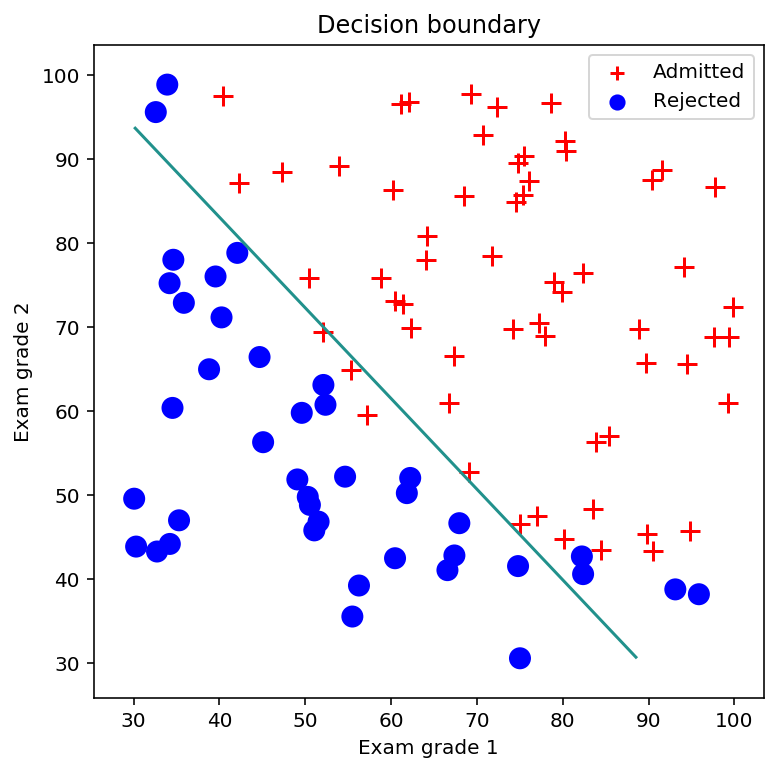

In [152]:
# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1, x2, idx_admit*100, marker='+', color='r', label='Admitted') 
plt.scatter(x1, x2, idx_rejec*100, color='b', label='Rejected') 
plt.contour(xx1, xx2, p, 1) 
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.title('Decision boundary')
plt.show()

## 7. Plot the decision boundary using the Scikit-learn logistic regression algorithm (2pt)

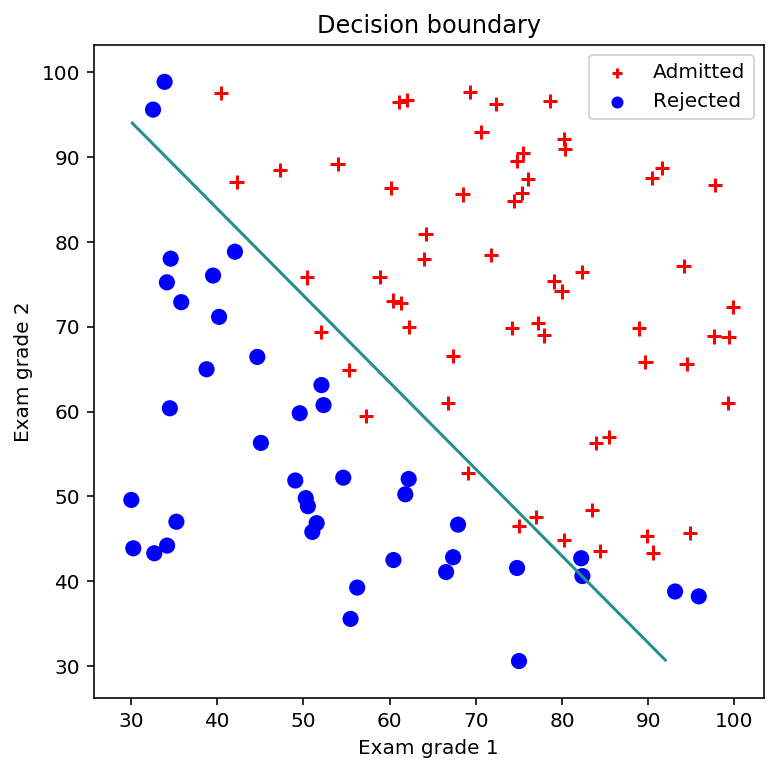

In [224]:
# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1, x2, idx_admit*50, marker='+', color='r', label='Admitted') 
plt.scatter(x1, x2, idx_rejec*50, color='b', label='Rejected')  
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # grade 2

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)

p_skl = f_pred(X2,w_sklearn)
p_skl = p_skl.reshape((len(xx1), len(xx2)))
plt.contour(xx1, xx2, p_skl, 1)

plt.title('Decision boundary')
plt.legend()
plt.show()

## 8. Plot the probability map using the mean square error (2pt)

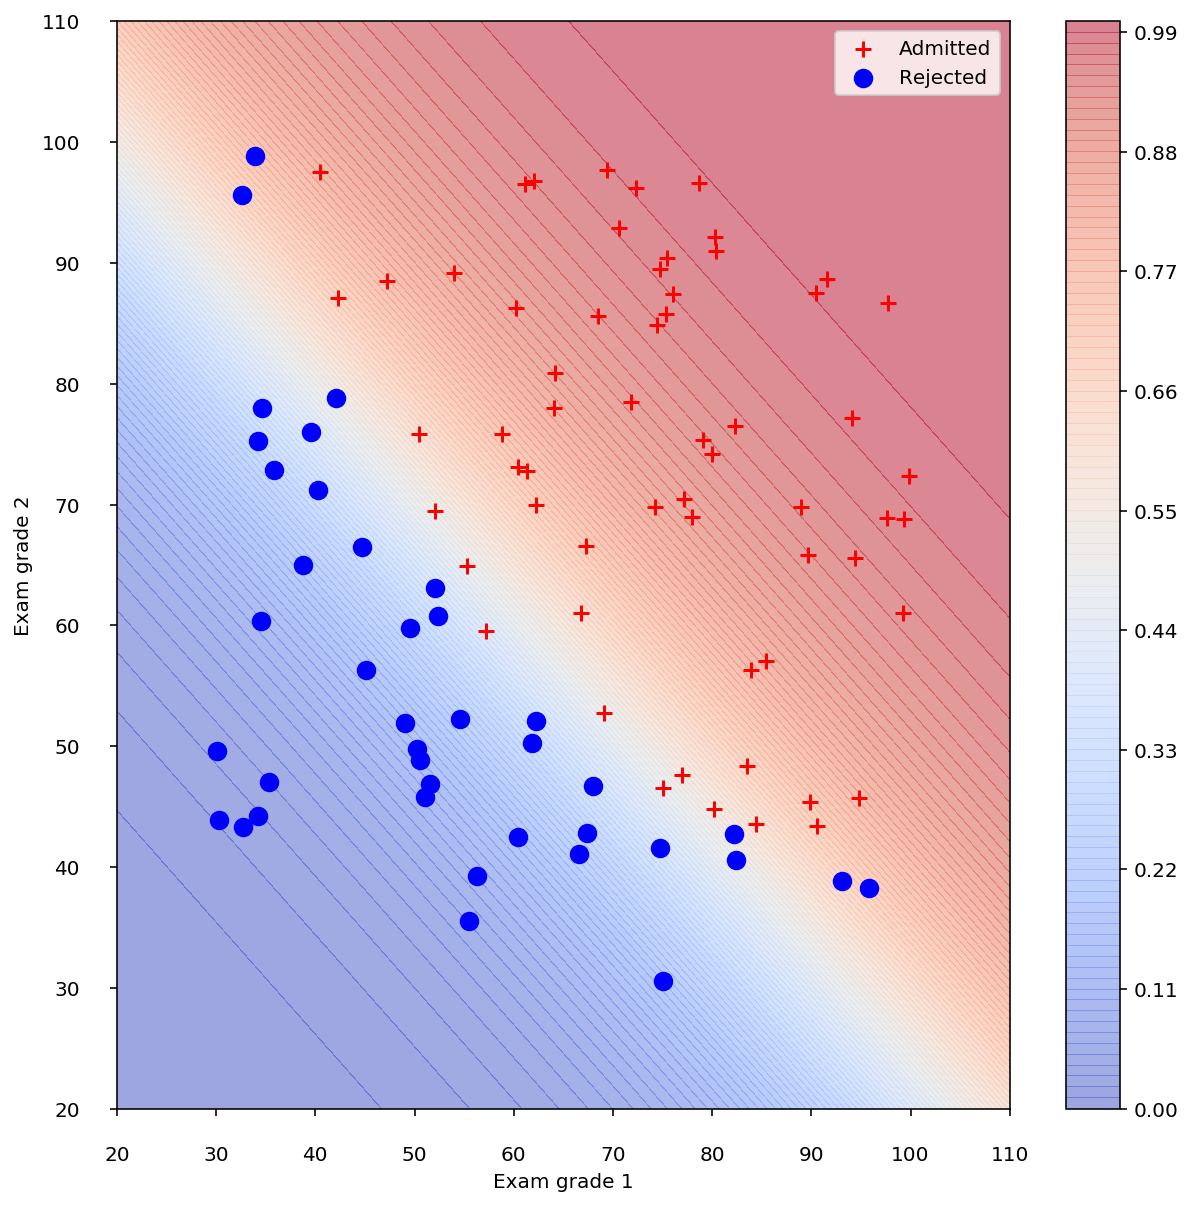

## 9. Plot the probability map using the cross-entropy error (2pt)

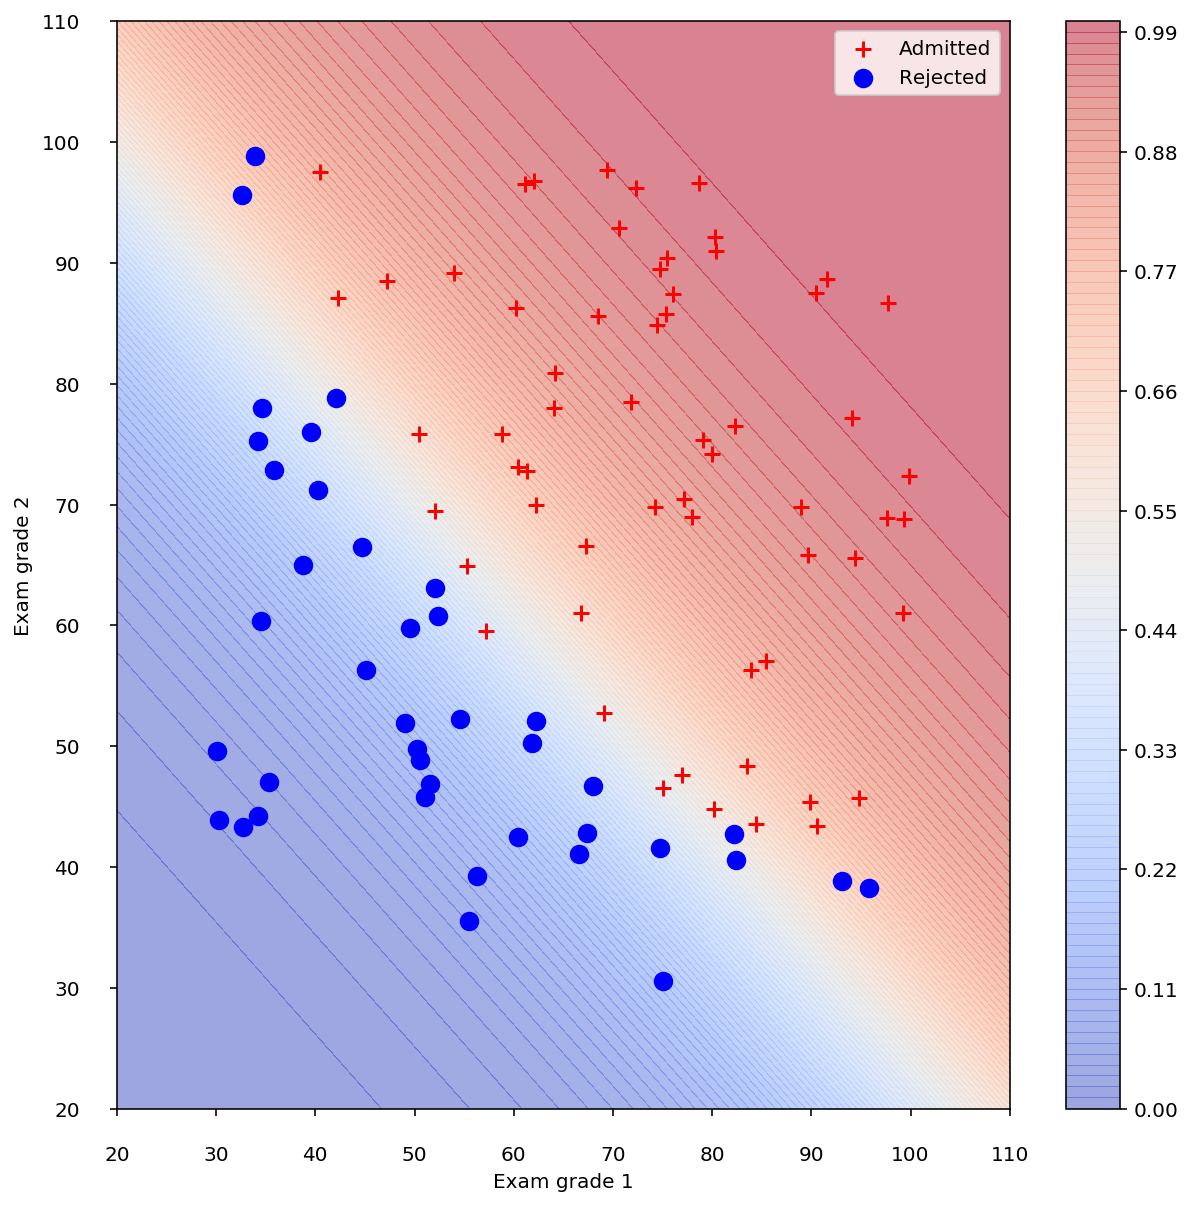